In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [8]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [12]:
# monthly sales trend


In [14]:
df['month'] = df['Order Date'].dt.to_period('M')

In [17]:
monthlysale = df.groupby("month")['Sales'].sum().reset_index()

In [18]:
monthlysale['month'] = monthlysale['month'].astype(str)

In [19]:
# visualization 


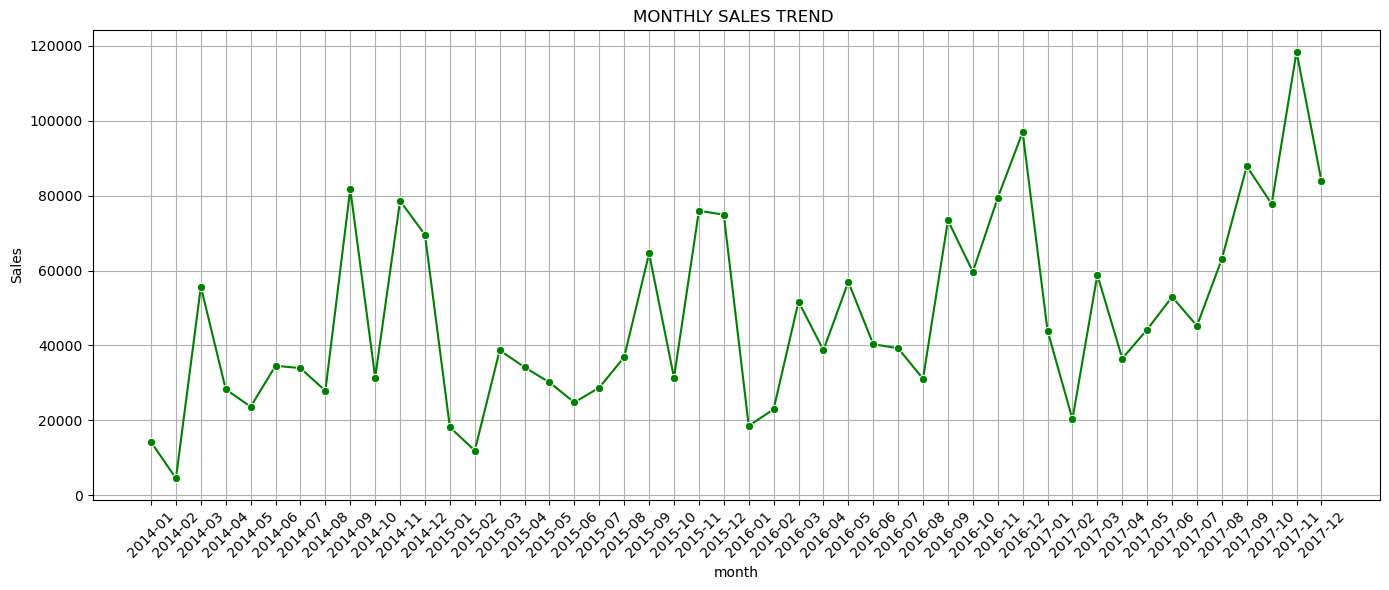

In [26]:
plt.figure(figsize=(14,6))
sns.lineplot(data=monthlysale, x='month', y='Sales', marker='o', color='green')
plt.title("MONTHLY SALES TREND ")

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
# top catogory by sales

In [29]:

catogory_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head()

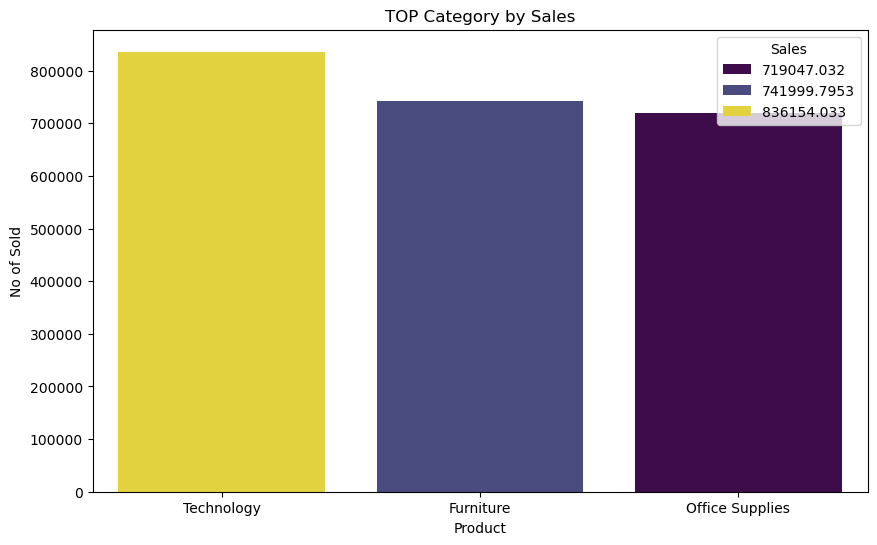

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=catogory_sales.index,y=catogory_sales.values,hue=catogory_sales,palette='viridis')
plt.title("TOP Category by Sales")
plt.xlabel("Product")
plt.ylabel("No of Sold")
plt.show()

In [34]:
subcatogory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head()

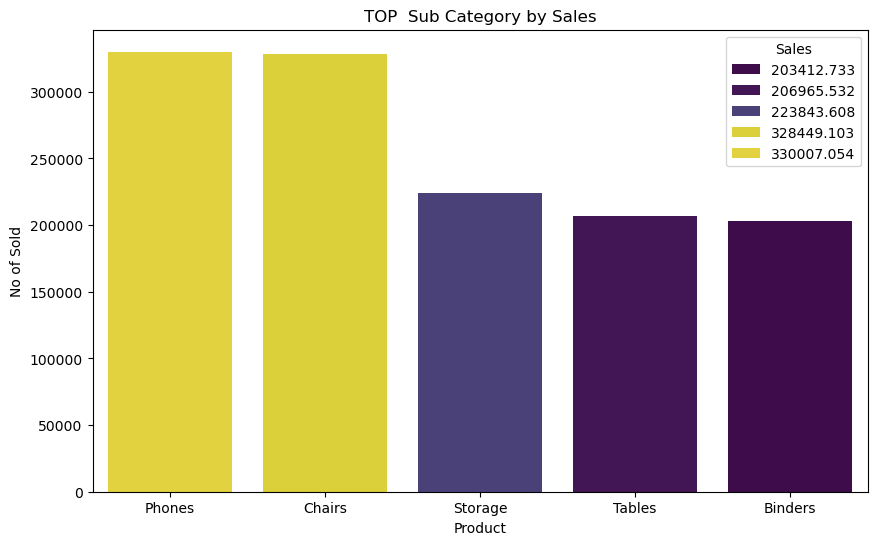

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=subcatogory_sales.index,y=subcatogory_sales.values,hue=subcatogory_sales,palette='viridis')
plt.title("TOP  Sub Category by Sales")
plt.xlabel("Product")
plt.ylabel("No of Sold")
plt.show()

In [37]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


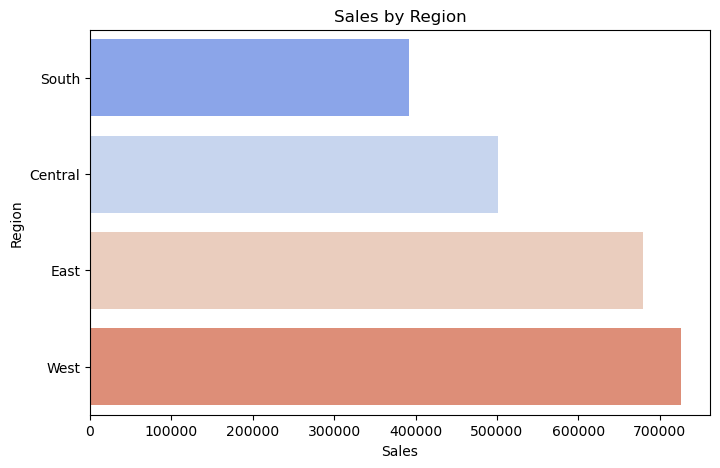

In [39]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.values, y=region_sales.index,hue=region_sales.index, palette='coolwarm')
plt.title('Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()


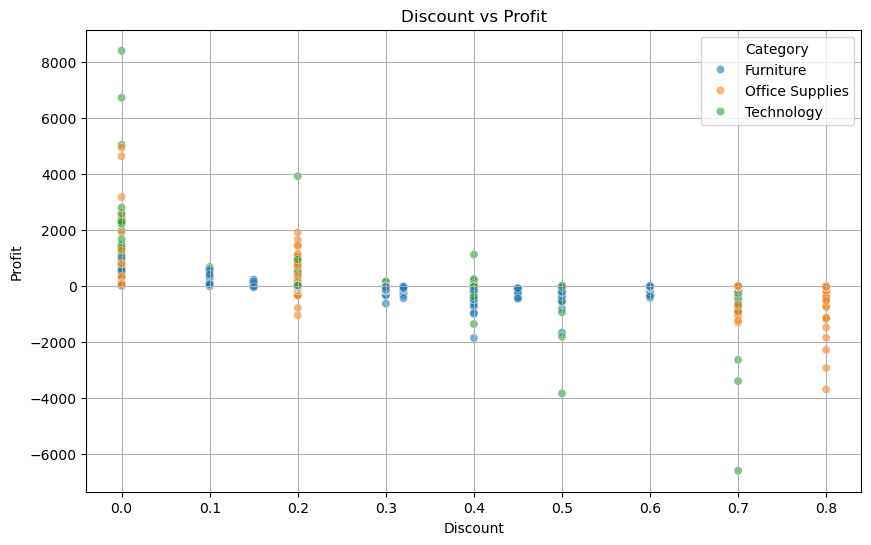

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.6)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


In [42]:
# Create a new column for status
df['Profit_Status'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else 'Loss')



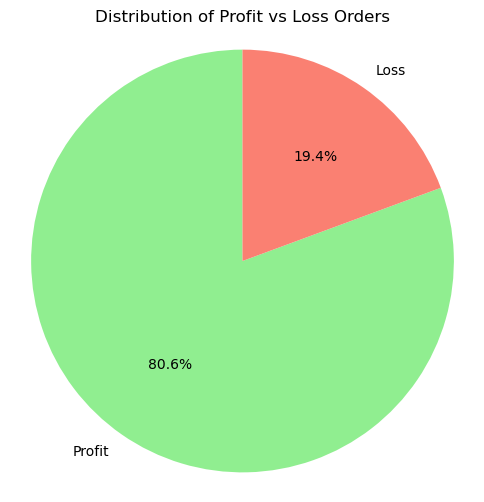

In [43]:
# Count number of profit and loss entries
profit_counts = df['Profit_Status'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(profit_counts.values,
        labels=profit_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightgreen', 'salmon'])

plt.title('Distribution of Profit vs Loss Orders')
plt.axis('equal')  # Makes the pie circular
plt.show()